## Replication and Extension of Paper:

Dobs, Katharina & Yuan, Joanne & Martinez, Julio & Kanwisher, Nancy. (2022). Using deep convolutional neural networks to test why human face recognition works the way it does. 10.1101/2022.11.23.517478. 


In [3]:
import os
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import correlation
import torch
from torchvision import transforms
from PIL import Image
from scipy.stats import spearmanr
import numpy as np
from facenet_pytorch import InceptionResnetV1, MTCNN
from scipy.stats import pearsonr
import torchvision.models as models
import matplotlib.pyplot as plt

In [4]:
# Defining functions for preprocessing images

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

preprocess = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [5]:
#Declaring the pretrained models used:

FACE_ID_CNN = InceptionResnetV1(pretrained='vggface2').eval()
UNTRAINED = models.vgg16(pretrained=False)
OBJ_CLASSIFICATION = models.vgg16(pretrained=True)

FACE_FEATURE_EXTRACTION = MTCNN(image_size=160, margin=0, min_face_size=20, thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True)
# CAR_CLASSIFICATION = 

#Models yet to be trained, datasets have been acquired:
# FACE_ID_INVERTED_CNN
# CAR_CLASSIFICATION_INVERTED_CNN
# FACE_ID_ASIAN_CNN
# FACE_ID_WHITE_CNN
# OBJ_FACE_CLASSIFICATION = 

100.0%
C:\Users\akmha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\akmha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\akmha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be remo

In [6]:
# TASK 1, Identity Matching (Checking the perforances of various CNNs trained for different specialisations on the task of identity matching)
# Selecting the face identical to target face out of the two given face images. 
# Human Accuracy ~ 90% (Exact replication not possible as the sets of three stimuli used were not provided to us by the authors)

def task1(model):
    image_folder = './Task_1/'
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        # Preprocess images
        image = preprocess(img)
        # Add batch dimension
        img_tensor = image.unsqueeze(0)
        # Get penultimate layer activations
        penultimate_layer_activation = model(img_tensor)[0].detach().numpy()
        images.append(penultimate_layer_activation)
    
    #Getting Accuracy Scores by comparing two images to a target image

    total = 0
    correct= 0

    for i in range (0,200,5):
        r1 = np.random.randint(0,5)
        r2 = np.random.randint(0,5)
        while r2==r1:
            r2 = np.random.randint(0,5)
        for j in range (0,200,5):
            if(i!=j):
                dist = 1 - pearsonr(images[i+r1],images[i+r2]).statistic
                dist2 = 1 - pearsonr(images[i+r1],images[j+r2]).statistic
                total+=1
                if(dist<dist2):
                    correct+=1
            
    accuracy = correct/total
    
    return accuracy


FACE_ID_CNN_Accuracy1 = task1(FACE_ID_CNN)
untrained_Accuracy1 = task1(UNTRAINED)
obj_classification_Accuracy1 = task1(OBJ_CLASSIFICATION)
# FFE_A1=task1(FACE_FEATURE_EXTRACTION)
# obj_face_classification_Accuracy1 = task1(OBJ_FACE_CLASSIFICATION)

#plot bargraph of each accuracy, and draw line at 90% denoting human accuracy
#x axis = model, y axis = accuracy
# plt.bar([1,2,3,4],[faceID_CNN_Accuracy1,untrained_Accuracy1,obj_classification_Accuracy1,obj_face_classification_Accuracy1])
# plt.plot([0,5],[0.9,0.9])
# plt.show()
    

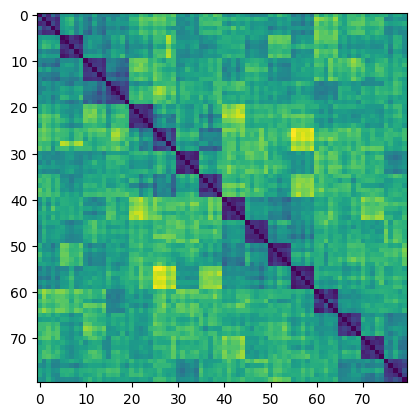

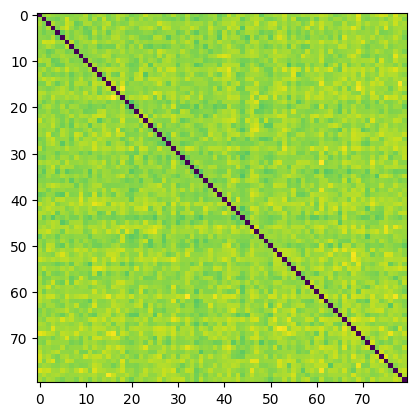

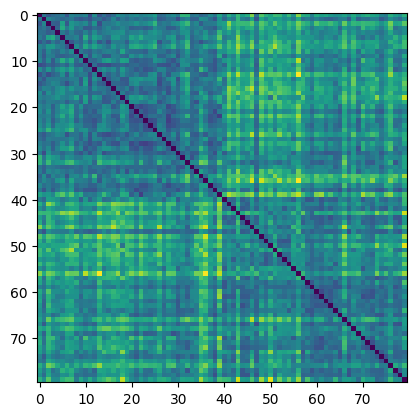

In [7]:
#TASK 2, Alignment Task (Mearing Representational Similarity using RSA)
#The RDMs generated for the pairwise distances between penultimate layer activations of all stimuli are to be compared to that of Human Beings.
#Can't be compared as the Human RDMs were not provided to us by the authors.

def task2(model):
    image_folder = './Task_2/'
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        # Preprocess images
        img = img.convert('RGB')
        image = preprocess(img)
        # Add batch dimension
        img_tensor = image.unsqueeze(0)
        # Get penultimate layer activations
        penultimate_layer_activation = model(img_tensor)[0].detach().numpy()
        images.append(penultimate_layer_activation)

    #Generating RDMs for the model
    RDM = pairwise_distances(images, metric='correlation')
    plt.imshow(RDM)
    plt.show()
    # Calculate Spearman rank correlation between network RDM and human behavioral RDM
    # spearman_corr, _ = spearmanr(rdm, human_rdm) ##not availiable-> human_rdm
    # return spearman_corr


task2(FACE_ID_CNN)
task2(UNTRAINED)
task2(OBJ_CLASSIFICATION)
# task2(OBJ_FACE_CLASSIFICATION)

#These RDMS are to be compared to the Human RDMs, and Spearman Rank correlation is to be used to compare each of the 
#RDMs generated by the models to the Human RDMs.

In [8]:
# Task 3, Similarity Matching
# Human beings were tasked to select the face identical to target face out of the two given face images.
# The performance of the CNNs was then compared with that of these CNNs. Since the dataset used for this task has not been provided, 
# this task cannot be replicated for the time being.

In [9]:
# Task 4, Verifying Other Race Effect and Face Inversion Effect

# Human beings performed worse when they were asked to identify the target image, given two images if the faces were inverted, or 
# belonged to different ethinicities the participants were not familiar with.

# Testing Face Inversion Effect:

def task4_inversion(model):
    image_folder = './Task_4_inversion/'
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        # Preprocess images
        image = preprocess(img)
        # Add batch dimension
        img_tensor = image.unsqueeze(0)
        # Get penultimate layer activations
        penultimate_layer_activation = model(img_tensor)[0].detach().numpy()
        images.append(penultimate_layer_activation)
    
    #Getting Accuracy Scores by comparing two images to a target image

    total = 0
    correct= 0

    for i in range (0,200,5):
        r1 = np.random.randint(0,5)
        r2 = np.random.randint(0,5)
        while r2==r1:
            r2 = np.random.randint(0,5)
        for j in range (0,200,5):
            if(i!=j):
                dist = 1 - pearsonr(images[i+r1],images[i+r2]).statistic
                dist2 = 1 - pearsonr(images[i+r1],images[j+r2]).statistic
                total+=1
                if(dist<dist2):
                    correct+=1
            
    accuracy = correct/total
    
    return accuracy

FACE_ID_CNN_Accuracy4_inversion = task4_inversion(FACE_ID_CNN)
# untrained_Accuracy4_inversion = task4_inversion(UNTRAINED)
# obj_classification_Accuracy4_inversion = task4_inversion(OBJ_CLASSIFICATION)
# obj_face_classification_Accuracy4_inversion = task4_inversion(OBJ_FACE_CLASSIFICATION)

#plot bargraph of each accuracy, with FACE_ID_CNN_Accuracy1 and FACE_ID_CNN_Accuracy4_inversion close togeather, and untrained_Accuracy1 and untrained_Accuracy4_inversion close togeather,
#and obj_classification_Accuracy1 and obj_classification_Accuracy4_inversion close togeather, and obj_face_classification_Accuracy1 and obj_face_classification_Accuracy4_inversion close togeather

# plt.bar([1,2,3,4],[faceID_CNN_Accuracy1,untrained_Accuracy1,obj_classification_Accuracy1,obj_face_classification_Accuracy1])
# plt.bar([1.5,2.5,3.5,4.5],[faceID_CNN_Accuracy4_inversion,untrained_Accuracy4_inversion,obj_classification_Accuracy4_inversion,obj_face_classification_Accuracy4_inversion])
# plt.plot([0,5],[0.9,0.9])
# plt.show()



# Testing Other Race Effect:
# We take CNNs trained only on white faces, and compare this with the performance on target matching as Task 1 with Asian Faces and White faces.
# We then take a CNN based on the same architecture, but trained on Asian faces, and compare this with the performance on target matching as Task 1 with Asian Faces and White faces.
# The performance drops can be compared with that observed in white and asian participants who underwent this task. 

def task4_Asian(model):
    image_folder = './Task_4_other_race/Asian/'
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        # Preprocess images
        image = preprocess(img)
        # Add batch dimension
        img_tensor = image.unsqueeze(0)
        # Get penultimate layer activations
        penultimate_layer_activation = model(img_tensor)[0].detach().numpy()
        images.append(penultimate_layer_activation)
    
    #Getting Accuracy Scores by comparing two images to a target image

    total = 0
    correct= 0

    for i in range (0,200,5): #needs to be changed. 
        r1 = np.random.randint(0,5)
        r2 = np.random.randint(0,5)
        while r2==r1:
            r2 = np.random.randint(0,5)
        for j in range (0,200,5): #needs to be changed. 
            if(i!=j):
                dist = 1 - pearsonr(images[i+r1],images[i+r2]).statistic
                dist2 = 1 - pearsonr(images[i+r1],images[j+r2]).statistic
                total+=1
                if(dist<dist2):
                    correct+=1
            
    accuracy = correct/total
    
    return accuracy

def task4_White(model):
    image_folder = './Task_4_other_race/White/'
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        # Preprocess images
        image = preprocess(img)
        # Add batch dimension
        img_tensor = image.unsqueeze(0)
        # Get penultimate layer activations
        penultimate_layer_activation = model(img_tensor)[0].detach().numpy()
        images.append(penultimate_layer_activation)
    
    #Getting Accuracy Scores by comparing two images to a target image

    total = 0
    correct= 0

    for i in range (0,200,5): #needs to be changed. 
        r1 = np.random.randint(0,5)
        r2 = np.random.randint(0,5)
        while r2==r1:
            r2 = np.random.randint(0,5)
        for j in range (0,200,5): #needs to be changed. 
            if(i!=j):
                dist = 1 - pearsonr(images[i+r1],images[i+r2]).statistic
                dist2 = 1 - pearsonr(images[i+r1],images[j+r2]).statistic
                total+=1
                if(dist<dist2):
                    correct+=1
            
    accuracy = correct/total
    
    return accuracy

# FACE_ID_WHITE_CNN_Accuracy4_Asian = task4_Asian(FACE_ID_WHITE_CNN)
# FACE_ID_WHITE_CNN_Accuracy4_White = task4_White(FACE_ID_WHITE_CNN)
# FACE_ID_ASIAN_CNN_Accuracy4_Asian = task4_Asian(FACE_ID_ASIAN_CNN)
# FACE_ID_ASIAN_CNN_Accuracy4_White = task4_White(FACE_ID_ASIAN_CNN)
#untrained_Accuracy4_Asian = task4_Asian(UNTRAINED)
#untrained_Accuracy4_White = task4_White(UNTRAINED)
#obj_classification_Accuracy4_Asian = task4_Asian(OBJ_CLASSIFICATION)
#obj_classification_Accuracy4_White = task4_White(OBJ_CLASSIFICATION)
#obj_face_classification_Accuracy4_Asian = task4_Asian(OBJ_FACE_CLASSIFICATION)
#obj_face_classification_Accuracy4_White = task4_White(OBJ_FACE_CLASSIFICATION)

#Plotting the results


# plt.bar([1,2,3,4],[FACE_ID_WHITE_CNN_Accuracy4_Asian,untrained_Accuracy4_Asian,obj_classification_Accuracy4_Asian,obj_face_classification_Accuracy4_Asian])
# plt.bar([1.5,2.5,3.5,4.5],[FACE_ID_WHITE_CNN_Accuracy4_White,untrained_Accuracy4_White,obj_classification_Accuracy4_White,obj_face_classification_Accuracy4_White])
# plt.plot([0,5],[0.9,0.9])
# plt.show()


In [ ]:
# Task 5, Inverted Inversion Effect
# We wish to find out if the drop in performance in inverted faces is 'special' in any sort of way, or is ir just a result of optimisation of 
# our perceptual system. 
# We check the perforance of the Face ID CNN on upright and inverted images and compare how it fares when a CNN trained on inverted faces is
# tested on upright faces as well as inverted faces.

# We also check if such a drop in performance occurs in a CNN specialised in recognising a particular object (We take the example of cars in this case)
# we see if the performance drop occurs when inverted images of cars are presented to these CNNs.

#Inverted Face Inversion Effect

# FACE_ID_INVERTED_CNN_Accuracy5_inverted = task4_inversion(FACE_ID_INVERTED_CNN)
# FACE_ID_INVERTED_CNN_Accuracy5 = task1(FACE_ID_INVERTED_CNN)

#Plot a bar graph with FACE_ID_CNN_Accuracy1, FACE_ID_CNN_Accuracy4_Inverted, FACE_ID_INVERTED_CNN_Accuracy5_inverted and FACE_ID_INVERTED_CNN_Accuracy5 on the x axis and y axis as the accuracy scores.